In [124]:
import sys
sys.path.append('../')

In [125]:
from scripts.utils import data_path
from scripts.cross_match_scripts import pandas_to_fits, desi_reliable_magnitudes
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

# Counterparts and field sources catalogs construction

## Load DESI-CSC 30 arcsec cone search match

In [126]:
desi_csc_orig = pd.read_pickle(data_path+'/csc_allsky_desi_r30_gaia_dered.gz_pkl',compression='gzip')

In [127]:
desi_csc_orig = desi_reliable_magnitudes(desi_csc_orig) #make cuts for SNR of flux + add colors
desi_csc_orig

/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getat

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
0,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9135,336127,359.993680,0.721193,1,0.264035,0.761373,1.464151,-2.279967,-0.936121,-109.650260,-1274.12740,2924.99000,2268.87720,293.554100,3.076859,0.628511,0.000788,0.000010,23.857758,22.736668,22.052845,NaN,NaN,NaN,NaN,14.279862,36.266293,25.085913,-3.999284,-0.742145,-3.078044,-4.096002,0.0,0.0,0.0,0.0,0.0,0.0,27.164009,9010_336127_9135,23.945846,23.945846,23.857758,22.796006,22.796006,22.736668,22.086035,22.086035,22.052845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.520281e-15,1.121090,1.804913,0.683823,NaN,NaN,NaN,NaN,NaN,NaN
1,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9169,336127,359.994202,0.722597,1,0.994499,2.786103,5.748118,6.166792,6.704570,-0.933517,1110.99740,2478.61230,1837.17550,249.912500,2.884505,0.622227,0.000782,0.000011,22.417845,21.328133,20.567974,20.519806,20.430973,NaN,14.885468,49.511795,119.418724,90.869820,10.473576,5.288656,-0.026110,3.618951,0.0,0.0,0.0,0.0,0.0,0.0,23.070881,9010_336127_9169,22.505989,22.505989,22.417845,21.387507,21.387507,21.328133,20.601186,20.601186,20.567974,20.524852,20.524852,20.519806,17.825852,20.434073,20.434073,20.430973,17.095073,NaN,NaN,NaN,NaN,14.885717,NaN,NaN,NaN,9.894579e-15,1.089712,1.849871,0.760159,0.048168,0.897160,0.088833,NaN,NaN,NaN
2,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9295,336127,359.997367,0.721166,1,0.287270,0.334849,0.528142,-1.608118,0.423848,16.828413,692.35394,2346.16870,1762.25840,213.479600,2.978809,0.614420,0.000778,0.000010,23.765974,23.628395,23.159851,NaN,23.428870,19.434230,15.398930,13.914554,14.056722,7.716652,-2.775487,0.332233,0.469412,2.225948,0.0,0.0,0.0,0.0,0.0,0.0,17.638166,9010_336127_9295,23.854274,23.854274,23.765974,23.687877,23.687877,23.628395,23.193123,23.193123,23.159851,NaN,NaN,NaN,NaN,23.431975,NaN,NaN,NaN,19.434892,NaN,NaN,NaN,15.399180,NaN,NaN,NaN,9.091730e-16,0.137579,0.606123,0.468544,NaN,NaN,NaN,NaN,NaN,NaN
3,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9271,336127,359.996619,0.722544,1,0.195305,0.580013,1.060394,-1.374197,0.465793,55.299458,840.05010,1941.29630,1459.10840,181.554780,2.827259,0.595737,0.000749,0.000010,24.184935,23.031937,22.403067,NaN,23.326414,18.142536,15.188987,8.605151,22.155508,14.287992,-2.310637,0.359518,1.513426,2.704489,0.0,0.0,0.0,0.0,0.0,0.0,15.723989,9010_336127_9271,24.273217,24.273217,24.184935,23.091406,23.091406,23.031937,22.436332,22.436332,22.403067,NaN,NaN,NaN,NaN,23.329518,NaN,NaN,NaN,18.143198,NaN,NaN,NaN,15.189237,NaN,NaN,NaN,1.825409e-15,1.152998,1.781868,0.628870,NaN,NaN,NaN,NaN,NaN,NaN
4,2CXO J000000.0+004331,0.000020,0.725285,2.625836e-15,0.492084,1.376434,9010,9360,336127,359.998741,0.722629,1,0.162211,0.722331,4.141845,10.932156,10.346854,281.147600,-6404.08400,1451.76900,1055.47450,125.596010,2.283064,0.530093,0.000696,0.000010,24.386390,22.793606,20.923704,19.898174,19.959871,16.377000,NaN,6.180582,23.467144,46.417503,16.518280,7.533284,7.418694,-20.397125,0.0,0.0,0.0,

### Primary filters and DESI duplicates (ra,dec) removal

In [193]:
#step 1: filter brick ID
#next sort by name_csc, ra, dec and flux_g, with flux_g from largest to smallest
desi_csc = desi_csc_orig.query('csc_flux_05_2 >= 3e-15')
desi_csc = desi_csc.query('brick_primary == True')
print('desi reliable catalog:', len(desi_csc))
desi_csc = desi_csc.sort_values(by=['csc_name', 'csc_ra', 'csc_dec', 'flux_g'], ascending=[True, True, True, False])

#step 2: remove duplicates in ['ra_csc', 'dec_csc', 'ra', 'dec'] and keep the one with the highest flux_g 
desi_csc = desi_csc.drop_duplicates(subset=['csc_ra', 'csc_dec', 'ra', 'dec'], keep='first')

print('desi reliable catalog after non-primary brick and duplicates removal:', len(desi_csc))
print('number of csc sources after filtering', desi_csc.csc_name.nunique())
#sort by sep_csc so that the closest objects are first
desi_csc.sort_values(by=['csc_name', 'dist_arcsec'], inplace=True)
desi_csc.sample(10)

desi reliable catalog: 1384805
desi reliable catalog after non-primary brick and duplicates removal: 1384801
number of csc sources after filtering 60672


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4
2486177,2CXO J144932.6-100947,222.386202,-10.163238,3.376648e-14,0.410397,1.147941,9010,4360,272483,222.386543,-10.168056,1,18.561413,32.287266,0.000000,-62.645985,-39.764336,7.453712,11813.848000,11.093395,5.071650,0.000000,0.391701,0.096092,0.000346,0.000009,18.959167,18.478653,inf,NaN,NaN,20.316300,12.317976,61.822033,72.711970,0.000000,-39.207623,-12.326460,0.138577,35.294120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.388808,9010_272483_4360,19.328472,19.328472,18.959167,18.727422,18.727422,18.478653,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.319068,NaN,NaN,NaN,12.319022,12.319022,12.317976,5.699022,NaN,0.480514,NaN,NaN,NaN,NaN,NaN,NaN,6.160677,NaN
299699,2CXO J010511.1+020224,16.296406,2.040222,3.836763e-15,1.623609,4.541476,9010,6524,341953,16.294351,2.046328,1,0.126477,0.221958,0.204249,1.298829,-1.042411,36.745155,-7036.034700,4422.321300,3127.910400,450.821300,2.860847,0.606068,0.000686,0.000010,24.665335,24.080675,24.194595,22.211561,NaN,18.586403,NaN,8.410776,12.413627,4.336724,2.196845,-0.811521,0.962472,-22.303375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.192845,9010_341953_6524,24.744971,24.744971,24.665335,24.134323,24.134323,24.080675,24.224600,24.224600,24.194595,22.216120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.587000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.505492e-16,0.584660,0.470740,-0.113920,NaN,NaN,NaN,NaN,NaN,NaN
2334390,2CXO J141508.8+520641,213.787026,52.111660,3.759400e-15,0.416311,1.164484,9011,1775,591712,213.782603,52.106841,1,0.287751,0.207731,0.235084,-0.661101,-2.081441,-16.932821,-59.904940,736.972000,388.922180,130.382610,6.423743,1.600501,0.002143,0.000025,23.812700,24.179464,24.056963,NaN,NaN,NaN,NaN,7.811646,4.096689,2.684310,-1.675568,-2.633250,-0.783772,-0.301291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.914691,9011_591712_1775,23.852458,23.852458,23.812700,24.206247,24.206247,24.179464,24.071942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.366764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2641741,2CXO J160744.2+655115,241.934559,65.854377,3.235229e-15,2.736832,7.655328,9011,2317,632778,241.935649,65.856017,1,0.169615,0.732457,5.852074,5.752004,4.938099,-25.951086,27.018732,569.277600,278.159850,122.057730,7.177903,2.152232,0.004609,0.000053,24.333275,22.775356,20.546661,20.595125,20.762829,NaN,18.920574,4.046941,12.216005,64.653564,15.410544,7.244432,-1.761760,0.197197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.118010,9011_632778_2317,24.426339,24.426339,24.333275,22.838045,22.838045,22.775356,20.581725,20.581725,20.546661,20.600452,20.600452,20.595125,17.901452,20.766101,20.766101,20.762829,17.427101,NaN,NaN,NaN,NaN,18.920838,NaN,NaN,NaN,1.009073e-14,1.557919,3.786614,2.228695,-0.048464,2.012527,-0.167704,NaN,NaN,NaN
2664248,2CXO J161827.6+350008,244.615032,35.002442,4.339765e-15,0.785180,2.196265,9011,746,520855,244.615206,35.006856,1,4.752500,11.200706,20.102945,46.846855,52.428513,235.081250,-720.536700,204.947000,52.148400,26.714790,3.306041,0.966559,0.002116,0.000017,20.735320,19.828135,19.214580,18.319155,18.198

# Calculating desi-sources around each source

In [194]:
def annuli_area_deg2(r_in_arcsec, r_out_arcsec):
    r_in_deg = r_in_arcsec/3600
    r_out_deg = r_out_arcsec/3600
    area = np.pi*(r_out_deg**2 - r_in_deg**2)
    return area

#make a dataframe of CSC sources
desi_csc['sep_larger_dbl_r98']  = desi_csc['dist_arcsec']>2*desi_csc['csc_r_98']


csc = pd.DataFrame(desi_csc.groupby(by = 'csc_name', ).agg({'csc_ra': np.mean, 'csc_dec': np.mean}))


#r_out = 10
#calculate total number of DESI sources withing 0-10 arcsec of each CSC source
#num_src_desi_small_r =  desi_csc.groupby(by = ['csc_name', pd.cut(desi_csc.dist_arcsec, [0, r_out]) ]).size().unstack()
#frac_sep_larger_dbl_r98 =  desi_csc.groupby('csc_name')['sep_larger_dbl_r98'].mean()
#csc['frac_sep_larger_dbl_r98'] = frac_sep_larger_dbl_r98
#csc['num_src_desi_small_r'] = num_src_desi_small_r
#desi_csc = desi_csc.merge(csc[['csc_name','num_src_desi_small_r', 'frac_sep_larger_dbl_r98', 'smallest_sep']], on='csc_name')

smallest_sep  = desi_csc.groupby('csc_name')['dist_arcsec'].min()
csc['smallest_sep'] = smallest_sep


csc.reset_index(inplace=True)
desi_csc = desi_csc.merge(csc[['csc_name','smallest_sep']], on='csc_name')

is_hostless = desi_csc.eval('smallest_sep > 2*csc_r_98')
desi_csc['is_hostless'] = is_hostless
hostless_df = desi_csc[is_hostless][['csc_name', 'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_radec_err',
       'csc_r_98', 'smallest_sep']].drop_duplicates(subset=['csc_ra', 'csc_dec'], keep='first')
desi_csc = desi_csc[~is_hostless]

desi_csc.sample(10)

,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,release,objid,brickid,ra,dec,brick_primary,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,dist_arcsec,desi_id,all_mag_g,rel_mag_g,rel_dered_mag_g,all_mag_r,rel_mag_r,rel_dered_mag_r,all_mag_z,rel_mag_z,rel_dered_mag_z,all_mag_w1,rel_mag_w1,rel_dered_mag_w1,vega_mag_w1,all_mag_w2,rel_mag_w2,rel_dered_mag_w2,vega_mag_w2,all_mag_w3,rel_mag_w3,rel_dered_mag_w3,vega_mag_w3,all_mag_w4,rel_mag_w4,rel_dered_mag_w4,vega_mag_w4,rel_desi_flux_corr_z,rel_dered_g_r,rel_dered_g_z,rel_dered_r_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,sep_larger_dbl_r98,smallest_sep,is_hostless
536875,2CXO J084251.0+362224,130.712846,36.373404,5.411599e-15,0.480317,1.343519,9011,881,527513,130.715437,36.377863,1,0.466508,0.899250,1.419193,-1.573292,-2.627395,16.836182,-509.196040,359.14398,114.75181,103.348885,3.219213,0.696601,0.000967,0.000013,23.205090,22.532604,22.073640,NaN,NaN,19.433470,NaN,8.840840,9.632973,14.427609,-2.822827,-2.192894,0.523629,-1.807070,0.0,0.0,0.0,0.0,0.0,0.0,17.722135,9011_527513_881,23.327852,23.327852,23.205090,22.615299,22.615299,22.532604,22.119896,22.119896,22.073640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.434391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.472469e-15,0.672486,1.131450,0.458964,NaN,NaN,NaN,NaN,NaN,NaN,True,0.848590,False
423985,2CXO J052150.9-253501,80.462411,-25.583713,3.466167e-15,1.461951,4.089296,9010,9128,188482,80.455931,-25.586932,1,0.201493,0.845360,2.350323,10.825201,7.560672,69.264690,-525.015870,1240.25590,836.85650,92.994736,2.668249,0.764630,0.001123,0.000011,24.157795,22.627460,21.541452,19.909240,20.300732,17.898110,NaN,7.096036,24.454960,22.665054,17.682722,6.611290,2.320946,-1.731167,0.0,0.0,0.0,0.0,0.0,0.0,24.019788,9010_188482_9128,24.239350,24.239350,24.157795,22.682396,22.682396,22.627460,21.572181,21.572181,21.541452,19.913910,19.913910,19.909240,17.214910,20.303599,20.303599,20.300732,16.964599,17.898720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.036511e-15,1.530335,2.616343,1.086008,1.632212,2.326728,-0.391492,NaN,NaN,NaN,True,2.697748,False
86405,2CXO J005450.3-373849,13.709727,-37.647072,2.099461e-14,0.411645,1.151434,9010,15901,128221,13.707151,-37.650417,1,1.542909,2.361220,3.500813,-30.653635,-20.371758,-515.658450,16.766752,1418.66190,454.23907,238.350720,4.222970,0.983009,0.001349,0.000016,21.988497,21.539774,21.124260,NaN,NaN,NaN,19.438763,58.113870,50.324400,54.047700,-62.992813,-20.197948,-18.942389,0.068008,0.0,0.0,0.0,0.0,0.0,0.0,14.102314,9010_128221_15901,22.029149,22.029149,21.988497,21.567159,21.567159,21.539774,21.139578,21.139578,21.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.438878,NaN,NaN,NaN,5.927655e-15,0.448723,0.864237,0.415514,NaN,NaN,NaN,NaN,NaN,NaN,True,0.281647,False
263817,2CXO J030108.8-003752,45.286951,-0.631369,6.127490e-15,0.507009,1.418180,9010,1192,326229,45.288455,-0.634286,1,-0.030969,0.051235,0.429649,2.834721,2.039414,19.859652,823.573300,3556.12520,2620.84060,415.475460,3.232880,0.701229,0.001796,0.000018,NaN,25.455803,23.266039,21.345755,21.712130,19.252062,15.209608,-1.846762,2.622955,8.757634,5.096888,1.707794,0.841745,3.499108,0.0,0.0,0.0,0.0,0.0,0.0,11.813756,9010_326229_1192,NaN,NaN,NaN,25.726083,NaN,NaN,23.417215,23.417215,23.266039,21.368724,21.368724,21.345755,18.669724,21.726237,NaN,NaN,NaN,19.255071,NaN,NaN,NaN,15.210744,NaN,NaN,NaN,8.244633e-16,NaN,NaN,NaN,1.920284,NaN,NaN,NaN,NaN,NaN,True,0.098537,False
32422,2CXO J002607.1-121741,6.529812,-12.294844,6.071028e-15,1.667065,4.663030,9010,2867,260327,6.524357,-12.291360,1,0.471967,0.803687,1.720503,4.121873,3.357522,-166.684720,-1304.108600,1233.27320,230.94540,60.872116,2.983474,0.651050,0.000658,0.000008,23.223974,

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 3769
number of not hostless x-ray sources with flux > 3e-15: 56903
fraction of hostless x-ray sources with flux > 3e-15: 0.062120912447257384
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 606
number of not hostless x-ray sources with flux > 1e-14: 22818
fraction of hostless x-ray sources with flux > 1e-14: 0.025870901639344263


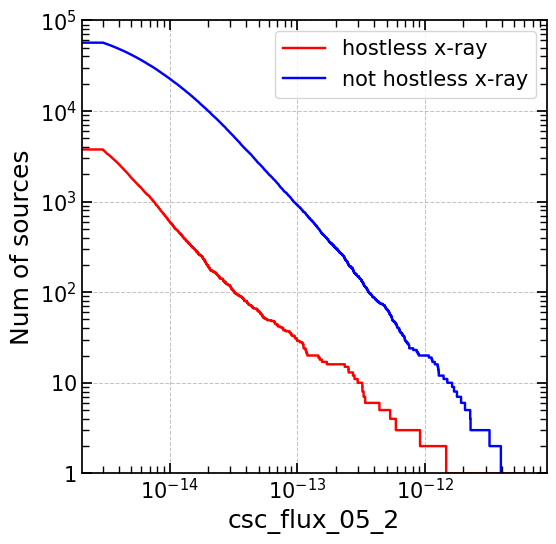

In [221]:
fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df['csc_flux_05_2'], label='hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')['csc_flux_05_2'], label='not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e5])
ax.legend()

for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first').query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

flux lim: 3e-15
number of hostless x-ray sources with flux > 3e-15: 43
number of not hostless x-ray sources with flux > 3e-15: 611
fraction of hostless x-ray sources with flux > 3e-15: 0.06574923547400612
flux lim: 1e-14
number of hostless x-ray sources with flux > 1e-14: 3
number of not hostless x-ray sources with flux > 1e-14: 245
fraction of hostless x-ray sources with flux > 1e-14: 0.012096774193548387


,csc_name,csc_ra,csc_dec,csc_flux_05_2,csc_radec_err,csc_r_98,smallest_sep
685604,2CXO J105433.8+565943,163.641188,56.995491,6.988451e-15,0.567520,1.587439,3.422088
658626,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9.735829
672483,2CXO J104539.2+591247,161.413384,59.213253,7.467221e-15,0.424348,1.186965,8.713669
658649,2CXO J103222.2+573934,158.092637,57.659698,4.350911e-15,0.475645,1.330449,5.585568
672575,2CXO J104544.2+585019,161.434203,58.838799,4.130239e-15,0.732739,2.049579,11.085349


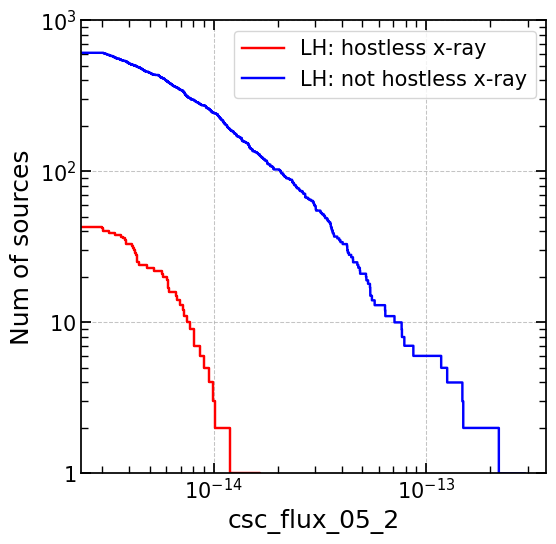

In [223]:
ra_min = 154.763934
ra_max = 167.084550
dec_min = 54.124219
dec_max = 61.236185

hostless_df_lh = hostless_df.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')
desi_csc_lh = desi_csc.query('csc_ra>=@ra_min & csc_ra<=@ra_max & csc_dec>=@dec_min & csc_dec<=@dec_max')

fig,  ax =  plt.subplots( figsize = (6,6))
sns.ecdfplot(hostless_df_lh['csc_flux_05_2'], label='LH: hostless x-ray', complementary=True, stat = 'count' , color='red', ax = ax)
sns.ecdfplot(desi_csc_lh.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first')['csc_flux_05_2'], label='LH: not hostless x-ray', complementary=True, stat = 'count' , color='blue', ax = ax)
ax.set(xscale='log', yscale='log', xlabel='csc_flux_05_2', ylabel='Num of sources', ylim = [1,1e3])
ax.legend()


for fluxlim in [3e-15, 1e-14]:
    print('flux lim:', fluxlim)
    n_hostless_flux_lim = hostless_df_lh.query('csc_flux_05_2 > @fluxlim').shape[0]
    n_not_hostless_flux_lim = desi_csc_lh.drop_duplicates(subset=['csc_name', 'csc_ra', 'csc_dec'], keep='first').query('csc_flux_05_2 > @fluxlim').shape[0]
    print(f'number of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim)
    print(f'number of not hostless x-ray sources with flux > {fluxlim}:', n_not_hostless_flux_lim)
    print(f'fraction of hostless x-ray sources with flux > {fluxlim}:', n_hostless_flux_lim/(n_not_hostless_flux_lim + n_hostless_flux_lim))

hostless_df_lh.sample(5)

In [213]:
erosita_orig_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl')

from scripts.cross_match_scripts import search_around_r_data_frames, cross_match_data_frames
ero_hostless = cross_match_data_frames(erosita_orig_df, hostless_df_lh, 'RA_fin', 'DEC_fin', 'csc_ra', 'csc_dec', match_radius = 20)
ero_hostless = ero_hostless.query('matched_sep < pos_r98')
ero_hostless

cross-match radius 20 arcsec
total matches: 15 out of 9215


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,matched_sep,matched_csc_name,matched_csc_ra,matched_csc_dec,matched_csc_flux_05_2,matched_csc_radec_err,matched_csc_r_98,matched_smallest_sep
0,SRGe J104522.1+555738,161.341945,55.960630,152.304418,53.373593,5.399608,68.293007,2.609625e-14,3.366189e-15,123.134895,15.883325,4310.726562,0.0,0.0,0.0,137,113,161.343954,55.959340,2.259828,24.419739,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.028565,0.003685,19.286982,161.341945,55.960630,850985342352984576,3.415644,9,2,20.952620,-1.0,0,NGC 3353,0.003137,AGN,3.965927,9,1,1,0,11.003000,10.653000,5.805,52.9,58.7,72.2,1,3,0,1237657771786960904,1020212140130199552,3.970055,70648862444,2.259828,1.930397,2.914112,4.725122,137.036588,43.554235,2.008208e-14,5.615032e+19,0.001023,2CXO J104521.9+555734,161.341659,55.959620,4.442071e-15,0.421621,1.179337,4.032758
1,SRGe J103220.4+573211,158.084926,57.536450,152.038959,50.997909,5.714911,47.720276,1.215233e-14,2.053674e-15,57.340401,9.690195,4310.707520,0.0,0.0,0.0,2338,1847,158.086934,57.535161,2.410135,42.324265,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.013302,0.002248,19.225595,158.084926,57.536450,-1,-1.000000,0,-1,NaN,-1.0,-1,CXCCLASXS J103220.2+573211,1.325000,StarburstG,7.092110,1,1,0,1,17.165001,16.132000,12.019,9.8,7.4,1.9,1,0,-1,0,0,NaN,64431840582,2.410135,2.043119,3.084277,5.001039,133.792317,43.981055,9.351694e-15,6.219869e+19,0.000395,2CXO J103220.2+573211,158.084192,57.536421,4.852860e-15,0.535893,1.498974,9.735829
2,SRGe J103239.4+574033,158.163965,57.675913,151.820726,50.949334,6.556224,41.886768,1.141266e-14,2.032680e-15,53.534840,9.534955,4285.457520,0.0,0.0,0.0,4018,3217,158.165973,57.674624,2.806527,102.086937,0.000005,6.268413e+08,6.270701e+08,0.0,0.0,0.012492,0.002225,17.782793,158.163965,57.675913,-1,-1.000000,0,-1,NaN,-1.0,-1,CXCCLASXS J103239.4+574035,0.450000,X,7.615802,1,1,0,0,17.516001,16.893000,12.725,7.3,3.6,-0.7,1,1,0,1237655108908745036,0,9.399318,63893786972,2.806527,2.343894,3.538325,5.737260,133.743205,44.122465,8.782485e-15,6.081946e+19,0.000657,2CXO J103239.3+574035,158.164092,57.676566,8.115216e-15,0.428977,1.199912,9.702210
3,SRGe J104453.1+585450,161.221287,58.913756,148.673162,51.419257,8.352394,23.074127,8.518546e-15,1.912364e-15,40.564137,9.106413,4350.350586,0.0,0.0,0.0,1595,1259,161.223296,58.912467,3.638715,47.357094,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.009324,0.002093,22.147514,161.221287,58.913756,-1,-1.000000,0,-1,NaN,-1.0,-1,SWIRE J104453.07+585453.1,1.940000,QSO,9.157732,2,1,1,1,17.163000,15.300000,11.507,9.5,13.8,6.1,1,0,-1,0,0,NaN,59212004290,3.638715,2.986037,4.507699,7.309063,134.748687,46.022099,6.555353e-15,7.683021e+19,0.001095,2CXO J104453.0+585453,161.221229,58.914850,6.011270e-15,0.474495,1.327232,10.587097
4,SRGe J103302.4+580241,158.260049,58.044662,151.304031,50.769846,6.663467,26.352280,7.908123e-15,1.716956e-15,36.842178,7.998915,4256.173828,0.0,0.0,0.0,4582,3700,158.262058,58.043372,2.856670,100.312660,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.008656,0.001879,19.341137,158.260049,58.044662,-1,-1.000000,0,-1,NaN,-1.0,-1,CXCCLASXS J103302.7+580240,2.150000,X,4.633183,1,1,0,1,17.084999,16.097000,12.626,10.3,7.3,2.5,1,0,-1,0,0,NaN,62482496312,2.856670,2.382235,3.596203,5.831108,133.538523,44.464701,6.085609e-15,5.905682e+19,0.000850,2CXO J103302.7+580240,158.261655,58.044693,5.264955e-15,0.747367,2.090497,6.516825
5,SRGe J105118.0+552353,162.824877,55.398127,152.140509,54.376633,10.753160,6.382204,7.854346e-15,3.218872e-15,10.824450,4.436081,1259.051025,

In [214]:
finall_hostless = pd.DataFrame({'ID': ero_hostless.srcname_fin,	'desi_id_true_ctp': 'hostless'})
finall_hostless.ID = finall_hostless.ID.str.encode('utf-8')
finall_hostless.desi_id_true_ctp = finall_hostless.desi_id_true_ctp.str.encode('utf-8')
finall_hostless.to_pickle(data_path+'validation_ctps_ero_desi_lh_hostless.pkl')

finall_hostless

,ID,desi_id_true_ctp
0,b'SRGe J104522.1+555738',b'hostless'
1,b'SRGe J103220.4+573211',b'hostless'
2,b'SRGe J103239.4+574033',b'hostless'
3,b'SRGe J104453.1+585450',b'hostless'
4,b'SRGe J103302.4+580241',b'hostless'
5,b'SRGe J105118.0+552353',b'hostless'
6,b'SRGe J104854.4+573926',b'hostless'
7,b'SRGe J104544.5+585020',b'hostless'
8,b'SRGe J103121.9+573134',b'hostless'
9,b'SRGe J104936.9+573948',b'hostless'
